# Churn bank dataset modelling:-

**1- loading the librarys and loading and first look at  the data**

**2- cleaning  the data**

**3- ploting the data and see the relationship between the features**

**4- preprocessing the data**

**5- loading the model and improveing it**

**6- evaluate the model** 

**7- finally show the importances for features** 


# 1-loading the librarys and loading and first look at  the data :-

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer


df=pd.read_csv('DATA/RAW_DATA.csv')

# first look at the data
print('first look:')
print (df.head())

#info about the data
print('\n info: ')
print (df.info())

#more statical info
print('\n statical info :')
print(df.describe())


first look:
   RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]

 info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   A

# 2- cleaning  the data.

In [250]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


**there isnt any missing data**

In [251]:
print(df.duplicated().sum())

0


**there isnt any duplicated data**

**Finally we will drop unnecessary columns:**

In [252]:
ndf=df.drop(['RowNumber' , 'CustomerId' , 'Surname'] , axis=1 )
ndf.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 3- ploting the data and see the relationship between the features:-

<function matplotlib.pyplot.show(close=None, block=None)>

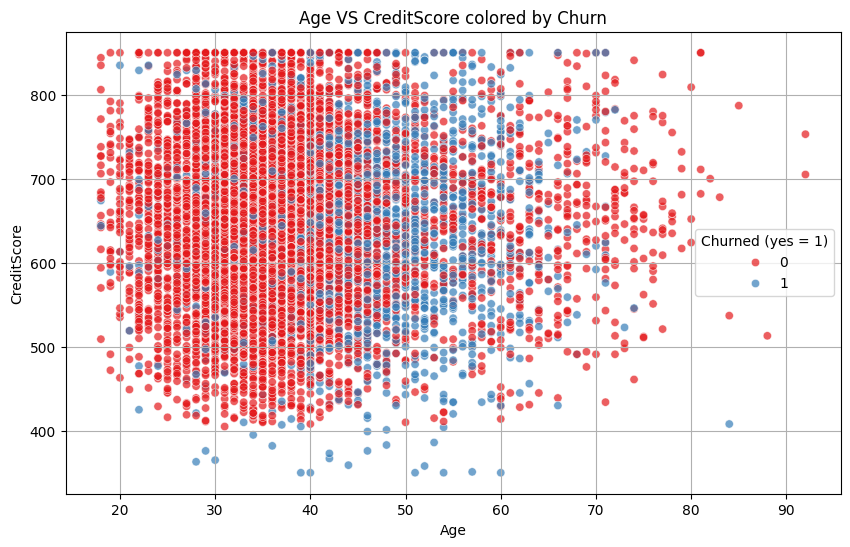

In [253]:
# age vs creditscore colored by churn state

plt.figure(figsize=(10,6))
sns.scatterplot(data=ndf , x='Age' , y='CreditScore' , hue='Exited' , alpha=0.7 ,  palette="Set1")
plt.title('Age VS CreditScore colored by Churn')
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.legend(title='Churned (yes = 1)')
plt.grid(True)
plt.show

**we see The churn rate increases with age**

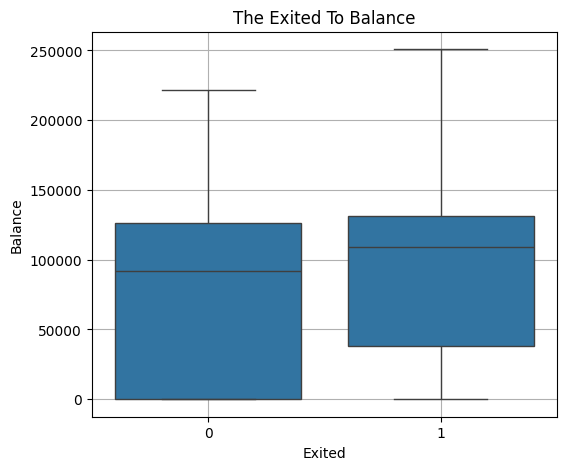

In [254]:
#Exited to Balance

plt.figure(figsize=(6,5))
sns.boxplot(data=ndf, x='Exited', y='Balance')
plt.title('The Exited To Balance')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

# 4- preprocessing the data :-

In [255]:
#sperate the futures and labels
X=ndf.drop(['Exited'] , axis=1)
y=ndf['Exited']

#Encode Gender
X['Gender']=LabelEncoder().fit_transform(X['Gender'])

#Encode Geography and scale all
ct=ColumnTransformer(transformers=[('geo' , OneHotEncoder(drop='first'), ['Geography']) ] , remainder='passthrough')

X=ct.fit_transform(X)

#Standardize
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 5-loading the model and improveing it :-

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#the model
model=RandomForestClassifier()

#improvement to get the best results possible
param_grid={
    'n_estimators': [50 , 100 , 250],      # numbers of trees
    'max_depth': [None, 15, 30],           # max depth of trees
    'min_samples_split': [2, 5, 10],       # min samples to split node
    'class_weight': [None, 'balanced']     # handle imbalanced data
}

Grid_search= GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',         
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1,            # use all CPU cores
    verbose=2             # prints progress

)

#train the model
Grid_search.fit(X_train , y_train)

#check for the best results
print("Best parameters found:", Grid_search.best_params_)
print("Best F1 score:", Grid_search.best_score_)

#make the prediction
best_model=Grid_search.best_estimator_
y_pred=best_model.predict(X_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best F1 score: 0.6188443493205051


# 6- finally evaluate the model :-

In [257]:
from sklearn.metrics import classification_report

print(classification_report( y_test , y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1607
           1       0.67      0.59      0.63       393

    accuracy                           0.86      2000
   macro avg       0.79      0.76      0.77      2000
weighted avg       0.86      0.86      0.86      2000



# 7- finally show the importances for features :-

In [259]:
# Get feature importances
importances = best_model.feature_importances_

# If you used ColumnTransformer and OneHotEncoder, get the real feature names
# Assuming you used `ct` as your ColumnTransformer:
feature_names = ct.get_feature_names_out()

# Create a DataFrame for better visualization
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print(feat_importance_df.head(10))

                       Feature  Importance
4               remainder__Age    0.277943
7     remainder__NumOfProducts    0.168568
6           remainder__Balance    0.136355
10  remainder__EstimatedSalary    0.115096
2       remainder__CreditScore    0.110154
5            remainder__Tenure    0.064671
9    remainder__IsActiveMember    0.045919
0       geo__Geography_Germany    0.035689
3            remainder__Gender    0.020187
8         remainder__HasCrCard    0.014022
